In [0]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

**[Example]** 3차 방정식 $x^3 - 10x^2 + 5=0$의 해를 구하시오.

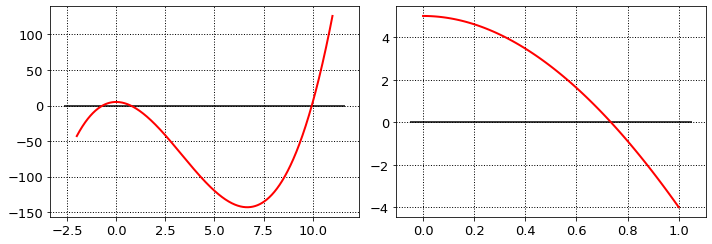

In [2]:
def func(x):
    return x**3 -10*x**2 + 5

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3.5))
x1 = np.linspace(-2, 11, 1001)
ax1.plot(x1, func(x1), 'r', lw=2)

x2 = np.linspace(0, 1, 101)
ax2.plot(x2, func(x2), 'r', lw=2)

for ax in (ax1, ax2):
    ax.hlines(0, *ax.get_xlim())
    ax.grid(color='k', ls=':', lw=1)
    ax.tick_params(labelsize=13)

fig.tight_layout()

# Root Formula for Polynomials

## Quadratic Equations

2차 방정식 $\boxed{ax^2 + bx + c = 0}$, $(a\neq0)$에 대한 근의 공식 :
$$\boxed{x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}}$$

In [3]:
# Pure python: ax^2 + bx + c = 0
def quadratic(a, b, c):
    d = b**2 - 4*a*c
    return (-b + d**0.5)/2/a, (-b - d**0.5)/2/a

quadratic(1, 1, 1)

((-0.49999999999999994+0.8660254037844386j), (-0.5-0.8660254037844386j))

## Cubic Equations

3차 방정식 $\boxed{ax^3 + bx^2 + cx + d = 0}$, $(a\neq0)$에 대해 $y = x - \dfrac{b}{3a}$ 대입하여 이차항을 소거하면,
$$\boxed{y^3 + py + q = 0}$$
여기서,
$$p = \frac{3ac - b^2}{3a^2},\quad q = \frac{2b^3 -9abc + 27a^2d}{27a^3}$$

$x^2 + x + 1 = 0$의 허근 $\omega=(-1\pm i\sqrt{3})/2$에 대해, 세 근을 다음과 같이 정의하면,
$$\Bigl[y-(\alpha+\beta)\Bigl]\Bigl[y-(\omega\alpha + \omega^2\beta)\Bigl]\Bigl[y-(\omega^2\alpha + \omega\beta)\Bigl] = 0$$

전개해서 3차 방정식의 계수를 비교하면,
$$\alpha^3 + \beta^3 = q,\quad \alpha\beta = -\frac{p}{3}$$

근과 계수와의 관계에서 $\alpha^3$과 $\beta^3$를 두 근으로 하는 이차방정식을 구하고, 근의 공식으로부터 
$$\alpha^3,\beta^3 = -\frac{q}{2} \pm\sqrt{\frac{q^2}{4} + \frac{p^3}{27}}$$

따라서, 세 근 $x_k$, $(k=0, 1, 2)$은 다음과 같이 주어진다.
$$\boxed{x_k = \omega^k\alpha + \omega^{-k}\beta - \frac{b}{3a}}$$

5차 이상의 다항식에 대해서는 일반적인 근의 공식이 존재하짐 않음이 증명되어 있다. (아벨)

In [4]:
# Pure python: ax^3 + bx^2 + cx + d = 0 => y^3 + py + q = 0
def cubic(a, b, c, d):
    p = (3*a*c - b**2)/3/a**2
    q = (2*b**3 - 9*a*b*c + 27*d*a**2)/27/a**3
    r = q**2/4 + p**3/27

    alpha = pow(-q/2 + r**0.5, 1/3)
    beta  = pow(-q/2 - r**0.5, 1/3) if alpha == 0 else -p/3/alpha
    w = (-1 + (-3)**0.5)/2

    return [alpha*w**k + beta/w**k -b/3/a for k in range(3)]

cubic(1, -10, 0, 5)

[(9.949491057914386-1.6653345369377348e-16j),
 (-0.6840945657036888-1.3322676295501878e-15j),
 (0.7346035077893034+1.7763568394002505e-15j)]

In [5]:
# Roots of a polynomial
np.roots([1, -10, 0, 5])

array([ 9.94949106,  0.73460351, -0.68409457])

# Bracketing Methods

$$\boxed{f(x) = 0,\quad a < x < b \quad\Rightarrow\quad f(a)\cdot f(b)<0}$$

해가 존재하는 구간 $[a,b]$를 점점 좁혀가는 방법이다.
$$[a, b] \supset [a^1, b^1] \supset \cdots \supset [a^n, b^n]$$

**축소 구간 정리 (Nested Inverval Property):**

구간 $I_n = [a_n, b_n]$, $n = 1, 2, \cdots$에 대해,
$$I_{n+1}\subset I_n,\quad\lim_{n\to\infty}(b_n - a_n) = 0$$
이면, $\cap_{n=0}^{\infty}I_n$은 한 점으로 수렴한다.

## Bisection Method

`scipy.optimize` 모듈에 있는 Bisection solver는 다음과 같이 정의되어 있다.
```python
optimize.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16,
            maxiter=100, full_output=False, disp=True)
```

In [6]:
optimize.bisect(func, 0, 1)

0.7346035077880515

In [7]:
optimize.bisect(func, 0, 1, full_output=True)

(0.7346035077880515,       converged: True
            flag: 'converged'
  function_calls: 41
      iterations: 39
            root: 0.7346035077880515)

**알고리듬-1:**

구간 $[x_1, x_2]$ 에 대해, 중점:
$$\boxed{x_\text{sol} = \frac{x_1 + x_2}{2}}$$

$x_{\text{sol}}$를 새로운 구간의 경계값 중 하나로 지정한다.

- Initialize $x_1=a$ and $x_2=b$

- Repeat for $k<N_\text{max}$

   - Set $\boxed{x_{\text{sol}} = \dfrac{x_1+x_2}{2}}$

   - If $|x_2-x_1|<\varepsilon$, stop and return $x_{\text{sol}}$

   - If $f(x_2)\cdot f(x_{\text{sol}})<0$, set $x_1=x_{\text{sol}}$

   - Else, set $x_2=x_{\text{sol}}$

In [8]:
def bisect1(func, a, b, args=(), maxiter=1000, tol=2e-12):
    x1, x2 = a, b
    for k in range(maxiter):
        xs = 0.5*(x1 + x2)    # Numerical solution

        if abs(x2 - x1) < tol: break
        elif func(x2, *args)*func(xs, *args) < 0:
            x1 = xs
        else:
            x2 = xs
    return xs, k+1

bisect1(func, 0, 1)

(0.734603507788961, 40)

In [9]:
# Count the number of function calls:
def func_calls(x):
    global n_calls
    n_calls += 1
    return func(x)

n_calls = 0
bisect1(func_calls, 0, 1), n_calls

((0.734603507788961, 40), 78)

**알고리듬-2:** 불필요 함수 호출 제거

- Initialize $x_1=a$, $f_1=f(a)$, $x_2=b$ and $f_2 = f(b)$

- Repeat for $k<N_\text{max}$

   - Set $\boxed{x_{\text{sol}} = \dfrac{x_1+x_2}{2}}$ and $f_{\text{sol}} = f(x_{\text{sol}})$

   - If $|x_2-x_1|<\varepsilon$, stop and return $x_{\text{sol}}$

   - If $f_2\cdot f_{\text{sol}}<0$, set $x_1=x_{\text{sol}}$ and $f_2 = f_{\text{sol}}$

   - Else, set $x_2=x_{\text{sol}}$, $f_2 = f_{\text{sol}}$

In [10]:
def bisect2(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        xs = 0.5*(x1 + x2)     # Numerical solution
        fs = func(xs, *args)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        if abs(x2 - x1) < tol: break
        elif f2*fs < 0: x1, f1 = xs, fs
        else:           x2, f2 = xs, fs

    return xs, k+1

n_calls = 0
bisect2(func_calls, 0, 1), n_calls

((0.734603507788961, 40), 42)

In [11]:
bisect2(func, 0, 1, verbose=True)

  1 >> [0.000000000000, 1.000000000000], x = 0.500000000000
  2 >> [0.500000000000, 1.000000000000], x = 0.750000000000
  3 >> [0.500000000000, 0.750000000000], x = 0.625000000000
  4 >> [0.625000000000, 0.750000000000], x = 0.687500000000
  5 >> [0.687500000000, 0.750000000000], x = 0.718750000000
  6 >> [0.718750000000, 0.750000000000], x = 0.734375000000
  7 >> [0.734375000000, 0.750000000000], x = 0.742187500000
  8 >> [0.734375000000, 0.742187500000], x = 0.738281250000
  9 >> [0.734375000000, 0.738281250000], x = 0.736328125000
 10 >> [0.734375000000, 0.736328125000], x = 0.735351562500
 11 >> [0.734375000000, 0.735351562500], x = 0.734863281250
 12 >> [0.734375000000, 0.734863281250], x = 0.734619140625
 13 >> [0.734375000000, 0.734619140625], x = 0.734497070312
 14 >> [0.734497070312, 0.734619140625], x = 0.734558105469
 15 >> [0.734558105469, 0.734619140625], x = 0.734588623047
 16 >> [0.734588623047, 0.734619140625], x = 0.734603881836
 17 >> [0.734588623047, 0.734603881836],

(0.734603507788961, 40)

## False Position Method

구간 $[x_1, x_2]$ 에 대해, 두점 $(x_1, f(x_1))$와 $(x_2,f(x_2))$를 지나는 직선:
$$y = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) + f(x_1)$$

$x$축과 교점을 $(x_{\text{sol}}, 0)$라고 두고 대입하여 정리하면,
$$x_{\text{sol}} = \frac{x_1f(x_2)-x_2f(x_1)}{f_2-f_1}$$

$x_{\text{sol}}$를 새로운 구간의 경계값 중 하나로 지정한다.

**알고리듬-1:**

- Initialize $x_1=a$, $f_1=f(a)$, $x_2=b$ and $f_2 = f(b)$

- Repeat for $k<N_\text{max}$

   - Set $\boxed{x_{\text{sol}} = \dfrac{x_1 f_2 - x_2 f_1}{f_2 - f_1}}$ and $f_{\text{sol}} = f(x_{\text{sol}})$

   - If $|x_2-x_1|<\varepsilon$, stop and return $x_{\text{sol}}$

   - If $f_2\cdot f_{\text{sol}}<0$, set $x_1=x_{\text{sol}}$, $f_1$ = $f_{\text{sol}}$
 
   - Else, set $x_2=x_{\text{sol}}$, $f_2 = f_{\text{sol}}$

In [12]:
def falsepos1(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        xs = (x1*f2 - x2*f1)/(f2 - f1)
        fs = func(xs, *args)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        if abs(x2 - x1) < tol: break
        elif f2*fs < 0: x1, f1 = xs, fs
        else:           x2, f2 = xs, fs

    return xs, k+1

bisect2(func, 0, 1), falsepos1(func, 0, 1)

((0.734603507788961, 40), (0.7346035077893033, 20))

In [13]:
# False position method 단점 (수렴속도)
def f(x): return x**10 - 1

bisect2(f, 0, 1.5), falsepos1(f, 0, 1.5)

((0.9999999999997726, 41), (0.9999999999999989, 1000))

In [14]:
falsepos1(f, 0, 1.5, maxiter=50, verbose=True)

  1 >> [0.000000000000, 1.500000000000], x = 0.026012294874
  2 >> [0.026012294874, 1.500000000000], x = 0.051573496758
  3 >> [0.051573496758, 1.500000000000], x = 0.076691428295
  4 >> [0.076691428295, 1.500000000000], x = 0.101373776470
  5 >> [0.101373776470, 1.500000000000], x = 0.125628094964
  6 >> [0.125628094964, 1.500000000000], x = 0.149461806448
  7 >> [0.149461806448, 1.500000000000], x = 0.172882204805
  8 >> [0.172882204805, 1.500000000000], x = 0.195896457213
  9 >> [0.195896457213, 1.500000000000], x = 0.218511605964
 10 >> [0.218511605964, 1.500000000000], x = 0.240734569867
 11 >> [0.240734569867, 1.500000000000], x = 0.262572144968
 12 >> [0.262572144968, 1.500000000000], x = 0.284031004287
 13 >> [0.284031004287, 1.500000000000], x = 0.305117696197
 14 >> [0.305117696197, 1.500000000000], x = 0.325838641021
 15 >> [0.325838641021, 1.500000000000], x = 0.346200125429
 16 >> [0.346200125429, 1.500000000000], x = 0.366208294183
 17 >> [0.366208294183, 1.500000000000],

(0.8586301898869992, 50)

**알고리듬-2:**

- Initialize $x_1=a$, $f_1=f(a)$, $x_2=b$ and $f_2 = f(b)$

- Repeat for $k<N_\text{max}$

   - Set $\boxed{x_{\text{sol}} = \dfrac{x_1 f_2 - x_2 f_1}{f_2 - f_1}}$ and $f_{\text{sol}} = f(x_{\text{sol}})$

   - If $\min(|x_1-x_\text{sol}|, |x_2-x_\text{sol}|)<\varepsilon$, stop and return $x_{\text{sol}}$

   - If $f_2\cdot f_{\text{sol}}<0$, set $x_1=x_{\text{sol}}$, $f_1$ = $f_{\text{sol}}$
 
   - Else, set $x_2=x_{\text{sol}}$, $f_2 = f_{\text{sol}}$

In [15]:
def falsepos2(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        xs = (x1*f2 - x2*f1)/(f2 - f1)
        fs = func(xs, *args)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        if min(abs(x1 - xs), abs(x2 - xs)) < tol: break
        elif f2*fs < 0: x1, f1 = xs, fs
        else:           x2, f2 = xs, fs

    return xs, k+1

falsepos1(f, 0, 1.5), falsepos2(f, 0, 1.5)

((0.9999999999999989, 1000), (0.9999999999794661, 300))

**알고리듬-3:** 이분법 추가

- Initialize $x_1=a$, $f_1=f(a)$, $x_2=b$ and $f_2 = f(b)$

- Repeat for $k<N_\text{max}$

   - Set $x_3 =\dfrac{x_1 + x_2}{2}$ and $f_3 = f(x_3)$

   - Set $\boxed{x_{\text{sol}} = \dfrac{x_1 f_2 - x_2 f_1}{f_2 - f_1}}$ and $f_{\text{sol}} = f(x_{\text{sol}})$

   - If $|x_2-x_1|<\varepsilon$, stop and return $x_{\text{sol}}$

   - If $f_2\cdot f_3<0$
   
      - If $f_{\text{sol}} > 0$, set $x_1=x_3$, $f_1$ = $f_3$ and $x_2=x_\text{sol}$, $f_2=f_\text{sol}$

      - Else, set $x_1 = x_\text{sol}$, $f_1 = f_\text{sol}$
 
   - Else

      - If $f_{\text{sol}} < 0$, set $x_1=x_\text{sol}$, $f_1$ = $f_\text{sol}$ and $x_2=x_3$, $f_2=f_3$

      - Else, set $x_2 = x_\text{sol}$, $f_2 = f_\text{sol}$

In [16]:
def falsepos3(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        x3 = (x1 + x2)/2 # Bisection method
        f3 = func(x3, *args)

        xs = (x1*f2 - x2*f1)/(f2 - f1)
        fs = func(xs, *args)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        if abs(x2 - x1) < tol: break
        elif f2*f3 < 0:
            if fs > 0: x1, f1 = x3, f3; x2, f2 = xs, fs
            else:      x1, f1 = xs, fs
        else:
            if fs < 0: x1, f1 = xs, fs; x2, f2 = x3, f3
            else:      x2, f2 = xs, fs

    return xs, k+1

falsepos2(f, 0, 1.5), falsepos3(f, 0, 1.5)

((0.9999999999794661, 300), (1.0, 34))

In [17]:
bisect2(f, 0, 1.5), falsepos1(f, 0, 1.5), falsepos2(f, 0, 1.5), falsepos3(f, 0, 1.5)

((0.9999999999997726, 41),
 (0.9999999999999989, 1000),
 (0.9999999999794661, 300),
 (1.0, 34))

In [18]:
falsepos3(f, 0, 1.5, maxiter=100, verbose=True)

  1 >> [0.000000000000, 1.500000000000], x = 0.026012294874
  2 >> [0.026012294874, 1.500000000000], x = 0.051573496758
  3 >> [0.051573496758, 1.500000000000], x = 0.076691428295
  4 >> [0.076691428295, 1.500000000000], x = 0.101373776470
  5 >> [0.101373776470, 1.500000000000], x = 0.125628094964
  6 >> [0.125628094964, 1.500000000000], x = 0.149461806448
  7 >> [0.149461806448, 1.500000000000], x = 0.172882204805
  8 >> [0.172882204805, 1.500000000000], x = 0.195896457213
  9 >> [0.195896457213, 1.500000000000], x = 0.218511605964
 10 >> [0.218511605964, 1.500000000000], x = 0.240734569867
 11 >> [0.240734569867, 1.500000000000], x = 0.262572144968
 12 >> [0.262572144968, 1.500000000000], x = 0.284031004287
 13 >> [0.284031004287, 1.500000000000], x = 0.305117696197
 14 >> [0.305117696197, 1.500000000000], x = 0.325838641021
 15 >> [0.325838641021, 1.500000000000], x = 0.346200125429
 16 >> [0.346200125429, 1.500000000000], x = 0.366208294183
 17 >> [0.366208294183, 1.500000000000],

(1.0, 34)

## Brent's Method

구간 $[x_1, x_2]$ 에 대해, 중점 $x_3 = (x_1 + x_2)/2$를 계산한다.

세 점 $(f_1, x_1)$, $(f_3, x_3)$, $(f_2, x_2)$를 지나는 Inverse quadratic interplation 함수:
$$x = \frac{(y-f_2)(y-f_3)}{(f_1-f_2)(f_1-f_3)}x_1 + \frac{(y-f_1)(y-f_3)}{(f_2-f_1)(f_2-f_3)}x_2 + \frac{(y-f_1)(y-f_2)}{(f_3-f_1)(f_3-f_2)}x_3$$

$x$축과의 교점 $(x_\text{sol}, 0)$을 대입하면,
$$\boxed{x_\text{sol} = \frac{f_2f_3x_1}{(f_1-f_2)(f_1-f_3)} + \frac{f_1f_3x_2}{(f_2-f_1)(f_2-f_3)} + \frac{f_1f_2x_3}{(f_3-f_1)(f_3-f_2)}}$$

$f_3=f_1$ 또는 $f_3=f_2$일 때는 직선의 교점을 구한다.
$$x_{\text{sol}} = \dfrac{x_1 f_2 - x_2 f_1}{f_2 - f_1}$$

$x_{\text{sol}}$를 새로운 구간의 경계값 중 하나로 지정한다.

`scipy.optimize` 모듈에 있는 Brent's method solver는 다음과 같이 정의되어 있다.
```python
optimize.brentq(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16,
                maxiter=100, full_output=False, disp=True)
```

In [19]:
optimize.brentq(func, 0, 1, full_output=True)

(0.7346035077893034,       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 0.7346035077893034)

In [20]:
def brent(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        x3 = (x1 + x2)/2 # Bisection method
        f3 = func(x3, *args)

        if (f1 - f3)*(f2 - f3) == 0:
            xs = (x1*f2 - x2*f1)/(f2 - f1) # Secant method
        else:  # Inverse quadratic interpolation
            xs = x1*f2*f3/(f1-f2)/(f1-f3) + x2*f1*f3/(f2-f1)/(f2-f3) \
               + x3*f1*f2/(f3-f1)/(f3-f2)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        fs = func(xs, *args)

        if abs(x2 - x1) < tol: break
        elif f2*f3 < 0:
            if fs > 0: x1, f1 = x3, f3; x2, f2 = xs, fs
            else:      x1, f1 = xs, fs
        else:
            if fs < 0: x1, f1 = xs, fs; x2, f2 = x3, f3
            else:      x2, f2 = xs, fs
                
    return xs, k+1

brent(func, 0, 1, verbose=True)

  1 >> [0.000000000000, 1.000000000000], x = 0.855676928169
  2 >> [0.855676928169, 1.000000000000], x = 0.737483053935
  3 >> [0.737483053935, 0.927838464085], x = 0.734635922768
  4 >> [0.734635922768, 0.832660759010], x = 0.734603613846
  5 >> [0.734603613846, 0.783648340889], x = 0.734603507883
  6 >> [0.734603507883, 0.759125977367], x = 0.734603507789
  7 >> [0.734603507789, 0.746864742625], x = 0.734603507789
  8 >> [0.734603507789, 0.740734125207], x = 0.734603507789
  9 >> [0.734603507789, 0.737668816498], x = 0.734603507789
 10 >> [0.734603507789, 0.736136162144], x = 0.734603507789
 11 >> [0.734603507789, 0.735369834967], x = 0.734603507789
 12 >> [0.734603507789, 0.734603507789], x = 0.734603507789


(0.7346035077893033, 12)

((0.3604217029596839, 39), (0.3604217029604528, 12), (0.3604217029603244, 6))

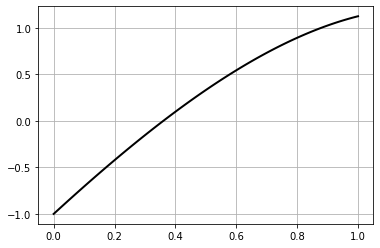

In [21]:
def g(x):
    return 3*x + np.sin(x) - np.exp(x)

x = np.linspace(0, 1, 101)
plt.plot(x, g(x), 'k', lw=2); plt.grid()

bisect2(g, 0, 0.5), falsepos2(g, 0, 0.5), brent(g, 0, 0.5)

## Ridders' Method

구간 $[x_1, x_2]$에 대해, 중점 $x_3 = (x_1 + x_2)/2$를 계산한다.

새로운 함수 $g(x)$를 정의하고,
$$g(x) = f(x)e^{(x-x_1)Q}$$

$x = x_1, x_2, x_3$를 대입하면,
$$g_1 = f_1,\quad g_2 = f_2e^{2hQ},\quad g_3 = f_3 e^{hQ},\quad h=\frac{x_2-x_1}{2}$$

세 점 $(x_1, g_1)$, $(x_2, g_2)$, $(x_3, g_3)$을 지나는 직선:
$$\frac{g_2-g_1}{2h} = \frac{g_3-g_1}{h}\quad\Rightarrow\quad
f_2e^{2hQ} - 2f_3e^{hQ} - f_1 = 0$$

2차 방정식의 근의 공식을 이용하여 $e^{hQ}$를 구하면,
$$e^{hQ} = \frac{f_3\pm\sqrt{f_3^2 - f_1f_2}}{f_2}$$

직선과 $x$축과의 교점 $(x_\text{sol}, 0)$을 구하면,
$$\boxed{x_{\text{sol}} = x_3+(x_3-x_1)\dfrac{\text{sign}(f_1-f_2)f_3}{\sqrt{(f_3^2-f_1f_2)}}}$$

$x_{\text{sol}}$를 새로운 구간의 경계값 중 하나로 지정한다.


`scipy.optimize` 모듈에 있는 Ridders' method solver는 다음과 같이 정의되어 있다.
```python
optimize.ridder(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, 
            maxiter=100, full_output=False, disp=True)
```

In [22]:
optimize.ridder(func, 0, 1, full_output=True)

(0.7346035077883111,       converged: True
            flag: 'converged'
  function_calls: 14
      iterations: 6
            root: 0.7346035077883111)

In [23]:
def ridders(func, a, b, args=(), maxiter=1000, tol=2e-12, verbose=False):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)
    for k in range(maxiter):
        x3 = 0.5*(x1 + x2)
        f3 = func(x3, *args)

        xs = x3 + (x3 - x1)*np.sign(f1 - f2)*f3/(f3**2 - f1*f2)**0.5
        fs = func(xs, *args)

        if verbose:
            print("%3d >> [%.12f, %.12f], x = %.12f" % (k+1, x1, x2, xs))

        if abs(x2 - x1) < tol: break
        elif f2*f3 < 0:
            if fs > 0: x1, f1 = x3, f3; x2, f2 = xs, fs
            else:      x1, f1 = xs, fs
        else:
            if fs < 0: x1, f1 = xs, fs; x2, f2 = x3, f3
            else:      x2, f2 = xs, fs

    return xs, k+1

ridders(func, 0, 1, verbose=True)

  1 >> [0.000000000000, 1.000000000000], x = 0.753103915611
  2 >> [0.753103915611, 1.000000000000], x = 0.734750562202
  3 >> [0.734750562202, 0.876551957805], x = 0.734603850757
  4 >> [0.734603850757, 0.805651260004], x = 0.734603507999
  5 >> [0.734603507999, 0.770127555381], x = 0.734603507789
  6 >> [0.734603507789, 0.752365531690], x = 0.734603507789
  7 >> [0.734603507789, 0.734603507789], x = 0.734603507789


(0.7346035077893032, 7)

# Open Methods

$$\boxed{f(x) = 0,\quad x = x_0}$$

수열 $x_1, x_2, x_3, \cdots$에 대한 점화식을 구하고, 수렴하는 값을 구한다.

**유형 1**
$$\boxed{x_1 = a,\quad x_n = g(x_{n-1}),\quad n\ge2}$$

**알고리듬-1:**

- Initialize $x_1=a$

- Repeat for $k<N_\text{max}$

   - Set $x_2 = g(x_1)$

   - If $|x_2-x_1|<\varepsilon$, stop and return $x_2$

   - Else, set $x_1 = x_2$

**유형 2**
$$\boxed{x_1 = a,\quad x_2 = b,\quad x_n = h(x_{n-1}, x_{n-2}),
\quad n\ge3}$$

**알고리듬-2:**

- Initialize $x_1=a$ and $x_2=b$

- Repeat for $k<N_\text{max}$

   - Set $x_3 = h(x_1, x_2)$

   - If $|x_3-x_2|<\varepsilon$, stop and return $x_3$

   - Else, set $x_1 = x_2$ and $x_2=x_3$

**수열의 극한 정의:** 수열 $\{x_n\}$의 극한값이 $\alpha$ 이면,
$$\lim_{n\to\infty}x_n = \alpha$$
기호로 나타내면,
$$\forall\epsilon>0,\quad\exists N>0 \quad\text{s.t.}\quad\forall n>N,\quad |x_n-\alpha|<\epsilon$$

**코시 수열 (Cauchy Sequences):**
$$\forall\epsilon>0,\quad \exists N>0 \quad\text{s.t.}\quad\forall n, m>N,\quad |x_n-x_m|<\epsilon$$

실해석학의 중요 결과로서, 수열이 수렴할 필요충분 조건은 코시 수열이어야 한다.

따라서, $n\to\infty$일 때, $|x_n - x_{n-1}|\to 0$ 이면 $\{x_n\}$은 수렴한다.

## Fixed Point Method

$$f(x) = 0\quad\Rightarrow\quad x=g(x)$$

점화식으로 나타내면,
$$x_{n+1} = g(x_n)$$

$|g'(x)|<1$이면 $\{x_n\}$은 수렴하고, $|g'(x)|>1$이면 발산한다.

**[Example]** $x^3 - 10x^2 + 5 = 0$의 근을 구하기 위해, 다음과 같이 변형한다.
$$x_{n+1} = g(x_n) = \frac{-5}{x_n(x_n-10)}$$

In [24]:
def g(x): return -5/x/(x-10)

def fixedpoint(func, x0, args=(), tol=1e-8, maxiter=1000):
    x1 = x0

    for k in range(maxiter):
        x2 = func(x1, *args)
        if abs(x2 - x1) < tol: break
        else: x1 = x2

    return x2, k+1

fixedpoint(g, 0.1)

(0.734603503321011, 232)

`scipy.optimize`에서 Fixed point solver를 제공하며, 이를 이용해 $f(x) = 0$의 근을 찾을 수 있다. 양변에 $x$를 더하면,
$$g(x) = f(x) + x = x$$

따라서, $g(x)$에 대한 고정점은 $f(x)=0$의 해가 된다.

```python
optimize.fixed_point(func, x0, args=(), xtol=1e-08, maxiter=500, method='del2')
```

In [25]:
optimize.fixed_point(lambda x: func(x) + x, 0.1)

array(0.73460351)

## Secant Method

두점 $(x_n, f(x_n))$와 $(x_{n-1},f(x_{n-1}))$를 지나는 직선:
$$y = \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}(x-x_{n-1}) + f(x_{n-1})$$

$x$축과 교점을 $(x_{n+1}, 0)$라고 두고 대입하여 정리하면,
$$\boxed{x_{n+1} = \frac{x_{n-1}f(x_n)-x_nf(x_{n-1})}{f(x_n)-f(x_{n-1})}}$$

Secant 방법은 기울기를 구하기 위해 초기값 2개가 필요로 한다. 근이 그 사이에 존재할 필요는 없기 때문에 Bracketing method에 포함되지 않는다.

In [0]:
def func(x):   return x**3 -10*x**2 + 5
def dfunc(x):  return 3*x**2 - 20*x
def dfunc2(x): return 6*x - 20

In [27]:
def secant(func, a, b, args=(), maxiter=100, verbose=False,
           tol=1.48e-8, rtol=0.0):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        x3 = (x1*f2 - x2*f1)/(f2 - f1)

        if verbose:
            print("%3d >> x = %.10f" % (k+1, x3))

        if np.allclose(x2, x3, atol=tol, rtol=rtol): break
        else:
            x1, f1 = x2, f2
            x2, f2 = x3, func(x3, *args)

    return x3, k+1

secant(func, 0, 1, verbose=True)

  1 >> x = 0.5555555556
  2 >> x = 0.7078449053
  3 >> x = 0.7379573621
  4 >> x = 0.7345490653
  5 >> x = 0.7346033992
  6 >> x = 0.7346035078
  7 >> x = 0.7346035078


(0.7346035077893033, 7)

## Newton's Method

**[유도과정-1]**

$(x_n, f(x_n))$을 지나는 직선의 방정식:
$$y = f'(x_n)(x - x_n) + f(x_n)$$

$x$축과 만나는 점을 $(x_{n+1},0)$이라고 두고 대입하면,
$$\boxed{x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}}$$

Newton's method는 2nd order로 수렴한다.

**[유도과정-2]**

$x_{n+1} = x_n + \Delta x$라고 두면, Taylor's expansion에 의해,
$$f(x_{n+1}) = f(x_n + \Delta x) \simeq f(x_n) + f'(x_n)\Delta x$$

$f(x_{n+1}) = 0$ 이므로, $\Delta x =- f(x_n)/f'(x_n)$ 이고, 
$$\boxed{x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}}$$

`scipy.optimize` 모듈에 있는 Newton' method solver는 다음과 같이 정의되어 있다.

```python
optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, 
            fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
```

In [28]:
optimize.newton(func, 0.1, full_output=True)

(0.7346035077893002,       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 0.7346035077893002)

In [29]:
optimize.newton(func, 0.1, fprime=dfunc, full_output=True)

(0.7346035077893033,       converged: True
            flag: 'converged'
  function_calls: 14
      iterations: 7
            root: 0.7346035077893033)

In [30]:
# Derivative
def newton(func, x0, fprime, args=(), maxiter=100, verbose=False,
           tol=1.48e-8, rtol=0.0):
    x1, f1 = x0, func(x0, *args)

    for k in range(maxiter):
        x2 = x1 - f1/fprime(x1, *args)

        if verbose:
            print("%3d >> x = %.10f" % (k+1, x2))

        if np.allclose(x1, x2, atol=tol, rtol=rtol): break
        else: x1, f1 = x2, func(x2, *args)
        
    return x2, k+1

newton(func, 0.1, fprime=dfunc, verbose=True)

  1 >> x = 2.5878172589
  2 >> x = 1.1781677514
  3 >> x = 0.8046764120
  4 >> x = 0.7372600518
  5 >> x = 0.7346077002
  6 >> x = 0.7346035078
  7 >> x = 0.7346035078


(0.7346035077893033, 7)

In [31]:
# Numerical differentiation
def newton_num(func, x0, h=1e-6, args=(), maxiter=100, 
               tol=1.48e-8, rtol=0.0):
    x1, f1 = x0, func(x0, *args)

    for k in range(maxiter):
        df1 = (func(x1+h, *args) - func(x1, *args))/h
        x2 = x1 - f1/df1

        if np.allclose(x1, x2, atol=tol, rtol=rtol): break
        else: x1, f1 = x2, func(x2, *args)
        
    return x2, k+1

newton_num(func, 0.1)

(0.7346035077893033, 7)

In [32]:
# Automatic differentiation using pytorch
import torch

def newton_ad(func, x0, args=(), tol=1e-12, maxiter=100):
    x1 = torch.tensor(x0, dtype=torch.float64, requires_grad=True)
    f1 = func(x1, *args)

    for k in range(maxiter):
        df1 = torch.autograd.grad(f1, x1)[0]
        x2 = x1 - f1/df1

        if abs(x2 - x1) < tol: break
        else: x1, f1 = x2, func(x2, *args)
        
    return x2.item(), k+1

newton_ad(func, 0.1)

(0.7346035077893033, 8)

## Halley's Method

다음 함수에 대해 Newton's method를 적용하면,
$$g(x) = \frac{f(x)}{\sqrt{|f'(x)|}}\quad\Rightarrow\quad
x_{n+1} = x_n - \frac{g(x_n)}{g'(x_n)}$$
여기서,
$$g'(x_n) = \frac{2[f'(x_n)]^2 - f(x_n)f''(x_n)}{2f'(x_n)\sqrt{|f'(x_n)|}}$$

대입하면,
$$\boxed{x_{n+1} = x_n - \frac{2f(x_n)f'(x_n)}{2[f'(x_n)]^2 - f(x_n)f''(x_n)}}$$

Halley's method는 3rd order로 수렴한다.

`scipy.optimize.newton()`의 `fprime2` 변수에 2차 도함수를 대입하면, Halley's method로 계산한다.

In [33]:
optimize.newton(func, 0.1, fprime=dfunc, fprime2=dfunc2, full_output=True)

(0.7346035077893033,       converged: True
            flag: 'converged'
  function_calls: 16
      iterations: 5
            root: 0.7346035077893033)

In [34]:
def halley(func, x0, fprime, fprime2, args=(), maxiter=100, verbose=False,
           tol=1.48e-8, rtol=0.0):
    x1, f1 = x0, func(x0, *args)

    for k in range(maxiter):
        df1, d2f1 = fprime(x1, *args), fprime2(x1, *args)
        x2 = x1 - 2*f1*df1/(2*df1**2 - f1*d2f1)

        if verbose:
            print("%3d >> x = %.10f" % (k+1, x2))

        if np.allclose(x1, x2, atol=tol, rtol=rtol): break
        else: x1, f1 = x2, func(x2, *args)
        
    return x2, k+1

halley(func, 0.1, fprime=dfunc, fprime2=dfunc2, verbose=True)

  1 >> x = 0.2877646313
  2 >> x = 0.6242795569
  3 >> x = 0.7338647769
  4 >> x = 0.7346035076
  5 >> x = 0.7346035078


(0.7346035077893032, 5)

## Muller's Method

세 점 $(x_1, f(x_1))$, $(x_2,f(x_2))$, $(x_3,f(x_3))$를 지나는 포물선:
$$p(x) = a(x-x_3)^2 + b(x-x_3)^2 + c$$

세 점을 대입하면, 
\begin{align*}
p(x_1) &= f(x_1) = a(x_1-x_3)^2 + b(x_1-x_3)^2 + c \\
p(x_2) &= f(x_2) = a(x_2-x_3)^2 + b(x_2-x_3)^2 + c \\
p(x_3) &= f(x_3) = c
\end{align*}

$a$, $b$를 구하기 위해서 행렬식으로 나타내면,
$$\begin{pmatrix} (x_1-x_3)^2 & x_1-x_3\\ (x_2-x_3)^2 & x_2-x_3 \end{pmatrix}
\begin{pmatrix}a \\ b\end{pmatrix} = \begin{pmatrix} f(x_1)-f(x_3) \\ f(x_1)-f(x_3)\end{pmatrix}$$

정리하면,
\begin{align*}
a &= \frac{(x_2-x_3)(f_1-f_3) - (x_1-x_3)(f_2-f_3)}{(x_1-x_3)(x_2-x_3)(x_1-x_2)}, \\
b &= \frac{(x_1-x_3)^2(f_2-f_3)-(x_2-x_3)^2(f_1-f_3)}{(x_1-x_3)(x_2-x_3)(x_1-x_2)}, \\
c &= f(x_3)
\end{align*}

$x$축과 교점을 $(x_4, 0)$라고 두고 대입하면,
$$p(x_4) = a(x_4-x_3)^2 + b(x_4-x_3)^2 + c = 0$$

2차 방정식의 근의 공식을 이용하면,
$$\boxed{x_4 = x_3 - \frac{2c}{b+\text{sign}(b)\sqrt{b^2-4ac}}}$$

Loss of significant bits에 의한 불안전성을 고려하여 역수에 대한 근의 공식을 사용한다.

In [35]:
def muller(func, a, b, args=(), maxiter=100, verbose=False,
           tol=1.48e-8, rtol=0.0):
    x1, f1 = a, func(a, *args)
    x2, f2 = b, func(b, *args)

    for k in range(maxiter):
        x3 = (x1 + x2)/2      # Assumption: x1 < x3 < x2
        f3 = func(x3, *args)
        
        a = ((x2-x3)*(f1-f3) - (x1-x3)*(f2-f3))/(x1-x3)/(x2-x3)/(x1-x2)
        b = ((f2-f3)*(x1-x3)**2 - (f1-f3)*(x2-x3)**2)/(x1-x3)/(x2-x3)/(x1-x2)
        c = f3

        x4 = x3 - 2*c/(b + np.sign(b)*np.sqrt(b**2 - 4*a*c))
        f4 = func(x4, *args)

        if verbose:
            print("%3d >> x = %.10f" % (k+1, x4))
        
        if x4 > x2:
            if np.allclose(x1, x4, atol=tol, rtol=rtol): break
            else:  x1, f1 = x2, f2; x2, f2 = x4, f4
        else:
            if np.allclose(x2, x4, atol=tol, rtol=rtol): break
            else: x2, f2 = x1, f1; x1, f1 = x4, f4

    return x4, k + 1

muller(func, 0, 1, verbose=True)

  1 >> x = 0.7381169618
  2 >> x = 0.7346742410
  3 >> x = 0.7346049380
  4 >> x = 0.7346035367
  5 >> x = 0.7346035084
  6 >> x = 0.7346035078


(0.7346035078011303, 6)

In [36]:
def f(x):   return 3*x + np.sin(x) - np.exp(x)
def df(x):  return 3 + np.cos(x) - np.exp(x)
def df2(x): return - np.sin(x) - np.exp(x)

print("Secant method   >> ", secant(f, 0, 1))
print("Muller's method >> ", muller(f, 0, 1))
print("Newton's method >> ", newton(f, 0, fprime=df))
print("Halley's method >> ", halley(f, 0, fprime=df, fprime2=df2))

Secant method   >>  (0.3604217029603244, 7)
Muller's method >>  (0.3604217029603244, 6)
Newton's method >>  (0.3604217029603244, 5)
Halley's method >>  (0.36042170296032444, 4)


# Unified Root Finding Solver `scipy.optimize.root_scalar`

```python
optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, 
            fprime2=None, x0=None, x1=None, xtol=None, rtol=None,
            maxiter=None, options=None)
```

다양한 Bracketing method 또는 Open method를 선택할 수 있다.

- `method='brentq', 'brenth', 'bisect', 'ridder', 'newton', 'toms748', 
'secant', 'halley'`
- `bracket=[a, b]`: Bracketing methods
- `x0=a`: Newton’s method
- `x0=a, x1=b`: secant method

In [37]:
optimize.root_scalar(func, bracket=[0,1]) # method='brentq' (default)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.7346035077893034

In [38]:
optimize.root_scalar(func, x0=0, x1=1) # Secant method

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.7346035077893033

In [39]:
optimize.root_scalar(func, x0=0.1, fprime=dfunc) # Newton method

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 0.7346035077893033

# Roots of Polynomials

다항식의 근을 바로 구할 때는 `np.roots()` 함수를 이용한다. 내림차순의 계수들을 대입한다.

In [40]:
np.roots([1, -10, 0, 5])

array([ 9.94949106,  0.73460351, -0.68409457])

Polynoimal 객체를 이용하여 함수로 사용하거나 다항식 연산을 쉽게 할 수 있다.

- `np.poly1d([1, 2, 3])`: $\Rightarrow x^2 + 2x + 3$
- `np.poly1d([1, 2, 3], r=True)`: $\Rightarrow (x-1)(x-2)(x-3)$

속성 (Attributes):

- `c`, `coef`, `coefficients`, `coeffs`: 계수
- `o`, `order`: 최고 차수
- `r`, `roots`: 모든 근
- `variable`: 변수명

메서드 (Methods):

- `deriv(m)`: 도함수 `m`은 미분 차수 (Default 1)
- `integ(m, k)`: 부정적분, `m`은 적분 차수 (Default 1), `k`는 적분 상수 (Default 0)

In [41]:
poly = np.poly1d([1, -10, 0, 5]) # 내림차순
print(poly)

   3      2
1 x - 10 x + 5


In [42]:
poly.roots

array([ 9.94949106,  0.73460351, -0.68409457])

In [43]:
poly(2)

-27

In [44]:
print(poly**2)

   6      5       4      3       2
1 x - 20 x + 100 x + 10 x - 100 x + 25


In [45]:
print(poly.deriv()) # 도함수

   2
3 x - 20 x


In [46]:
print(poly.deriv(2)) # 2계 도함수

 
6 x - 20


In [47]:
print(poly.integ()) # 부정적분

      4         3
0.25 x - 3.333 x + 5 x


In [48]:
print(poly.integ(2)) # 2계 부정적분

      5          4       2
0.05 x - 0.8333 x + 2.5 x


In [49]:
 # 2계 부정적분 (일차항 계수, 상수항)
print(poly.integ(2, k=[2, 1]))

      5          4       2
0.05 x - 0.8333 x + 2.5 x + 2 x + 1
